# Module 11 Challenge
## Deliverable 2: Scrape and Analyse Mars Weather Data

In [1]:
# Import relevant libraries
from splinter import Browser
from bs4 import BeautifulSoup
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
browser = Browser('chrome')

### Step 1: Visit the Website

Use automated browsing to visit the [Mars Temperature Data Site](https://static.bc-edx.com/data/web/mars_facts/temperature.html). Inspect the page to identify which elements to scrape.

   > **Hint** To identify which elements to scrape, you might want to inspect the page by using Chrome DevTools to discover whether the table contains usable classes.


In [3]:
# Visit the website
url = 'https://static.bc-edx.com/data/web/mars_facts/temperature.html'
browser.visit(url)


### Step 2: Scrape the Table

Create a Beautiful Soup object and use it to scrape the data in the HTML table.

Note that this can also be achieved by using the Pandas `read_html` function. However, use Beautiful Soup here to continue sharpening your web scraping skills.

In [4]:
# Scrape the website
html = browser.html
# Create a Beautiful Soup Object
soup = BeautifulSoup(html, 'html.parser')

In [5]:
# Extract all rows of data
# Find the table
table = soup.find('table', class_='table')

print(table)

<table class="table">
<tbody><tr>
<th>id</th>
<th>terrestrial_date</th>
<th>sol</th>
<th>ls</th>
<th>month</th>
<th>min_temp</th>
<th>pressure</th>
</tr>
<tr class="data-row">
<td>2</td>
<td>2012-08-16</td>
<td>10</td>
<td>155</td>
<td>6</td>
<td>-75.0</td>
<td>739.0</td>
</tr>
<tr class="data-row">
<td>13</td>
<td>2012-08-17</td>
<td>11</td>
<td>156</td>
<td>6</td>
<td>-76.0</td>
<td>740.0</td>
</tr>
<tr class="data-row">
<td>24</td>
<td>2012-08-18</td>
<td>12</td>
<td>156</td>
<td>6</td>
<td>-76.0</td>
<td>741.0</td>
</tr>
<tr class="data-row">
<td>35</td>
<td>2012-08-19</td>
<td>13</td>
<td>157</td>
<td>6</td>
<td>-74.0</td>
<td>732.0</td>
</tr>
<tr class="data-row">
<td>46</td>
<td>2012-08-20</td>
<td>14</td>
<td>157</td>
<td>6</td>
<td>-74.0</td>
<td>740.0</td>
</tr>
<tr class="data-row">
<td>57</td>
<td>2012-08-21</td>
<td>15</td>
<td>158</td>
<td>6</td>
<td>-78.0</td>
<td>740.0</td>
</tr>
<tr class="data-row">
<td>68</td>
<td>2012-08-22</td>
<td>16</td>
<td>158</td>
<td>6</td>
<

### Step 3: Store the Data

Assemble the scraped data into a Pandas DataFrame. The columns should have the same headings as the table on the website. Here’s an explanation of the column headings:

* `id`: the identification number of a single transmission from the Curiosity rover
* `terrestrial_date`: the date on Earth
* `sol`: the number of elapsed sols (Martian days) since Curiosity landed on Mars
* `ls`: the solar longitude
* `month`: the Martian month
* `min_temp`: the minimum temperature, in Celsius, of a single Martian day (sol)
* `pressure`: The atmospheric pressure at Curiosity's location

In [6]:
# Create an empty list for the row data
rows_data = []
# find all the rows in the table excluding the header row
rows = table.find_all('tr', class_ = 'data-row')

# Loop through the rows minus the header row
for row in rows:
    # Extract data from each cell in the row
    row_data = [data.text.strip() for data in row.find_all('td')]
    # Add to row data list
    rows_data.append(row_data)

# extract the header row headings 
header_row = table.find('tr')
headings = [header.text.strip() for header in header_row.find_all('th')]

### Quit the browser here as table data extracted, frees up computer resources

In [7]:
# Quit the browsing session as table data extracted
browser.quit()

In [8]:
# Create a Pandas DataFrame by using the list of rows and a list of the column names
Mars_df = pd.DataFrame(rows_data, columns=headings)

In [9]:
# Confirm DataFrame was created successfully
Mars_df.head()

,id,terrestrial_date,sol,ls,month,min_temp,pressure
0,2,2012-08-16,10,155,6,-75.0,739.0
1,13,2012-08-17,11,156,6,-76.0,740.0
2,24,2012-08-18,12,156,6,-76.0,741.0
3,35,2012-08-19,13,157,6,-74.0,732.0
4,46,2012-08-20,14,157,6,-74.0,740.0


### Step 4: Prepare Data for Analysis

Examine the data types that are currently associated with each column. If necessary, cast (or convert) the data to the appropriate `datetime`, `int`, or `float` data types.

  > **Hint** You can use the Pandas `astype` and `to_datetime` methods to accomplish this task.


In [10]:
# Examine data type of each column
print('data types before conversion: ')
print(Mars_df.dtypes)

data types before conversion: 
id                  object
terrestrial_date    object
sol                 object
ls                  object
month               object
min_temp            object
pressure            object
dtype: object


In [11]:
# Change data types for data analysis
# Convert 'id', 'sol', 'ls', 'month' columns to integer
Mars_df[['id', 'sol', 'ls', 'month']] = Mars_df[['id', 'sol', 'ls', 'month']].astype(int)

# Convert 'terrestrial_date' column to datetime
Mars_df['terrestrial_date'] = pd.to_datetime(Mars_df['terrestrial_date'])

# Convert 'min_temp', 'pressure' columns to float
Mars_df[['min_temp', 'pressure']] = Mars_df[['min_temp', 'pressure']].astype(float)


In [12]:
# Confirm type changes were successful by examining data types again
print('data types after conversion: ')
print(Mars_df.dtypes)

data types after conversion: 
id                           int64
terrestrial_date    datetime64[ns]
sol                          int64
ls                           int64
month                        int64
min_temp                   float64
pressure                   float64
dtype: object


### Step 5: Analyse the Data

Analyse your dataset by using Pandas functions to answer the following questions:

1. How many months exist on Mars?
2. How many Martian (and not Earth) days worth of data exist in the scraped dataset?
3. What are the coldest and the warmest months on Mars (at the location of Curiosity)? To answer this question:
    * Find the average the minimum daily temperature for all of the months.
    * Plot the results as a bar chart.
4. Which months have the lowest and the highest atmospheric pressure on Mars? To answer this question:
    * Find the average the daily atmospheric pressure of all the months.
    * Plot the results as a bar chart.
5. About how many terrestrial (Earth) days exist in a Martian year? To answer this question:
    * Consider how many days elapse on Earth in the time that Mars circles the Sun once.
    * Visually estimate the result by plotting the daily minimum temperature.


In [13]:
# 1. How many months are there on Mars? 12
# count the number of unique months in the month column
num_months = Mars_df['month'].value_counts().sort_index()

print(num_months)

month
1     174
2     178
3     192
4     194
5     149
6     147
7     142
8     141
9     134
10    112
11    138
12    166
Name: count, dtype: int64


In [14]:
# 2. How many Martian days' worth of data are there? 1867
num_days = Mars_df['sol'].nunique()
num_days

1867

In [15]:
# 3. What is the average low temperature by month?
#Find the average min_temp for the month using groupby
monthly_avg_temp = Mars_df.groupby('month')['min_temp'].mean()
monthly_avg_temp

month
1    -77.160920
2    -79.932584
3    -83.307292
4    -82.747423
5    -79.308725
6    -75.299320
7    -72.281690
8    -68.382979
9    -69.171642
10   -71.982143
11   -71.985507
12   -74.451807
Name: min_temp, dtype: float64

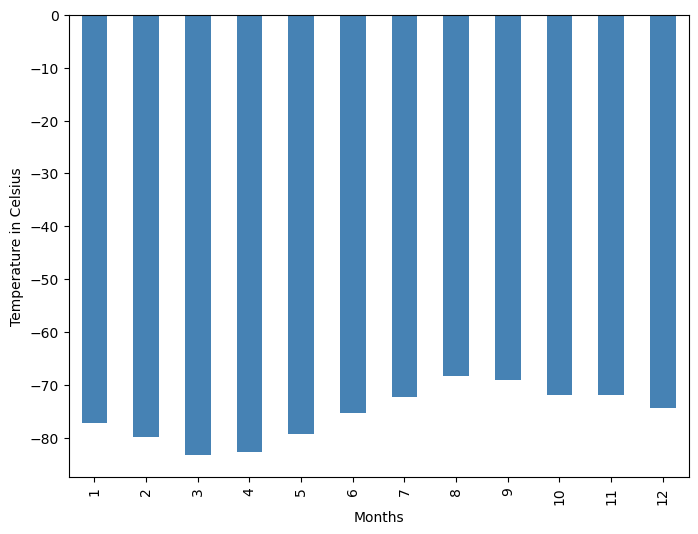

In [16]:
# Plot the average temperature by month
monthly_avg_temp.plot(kind='bar', color='steelblue', figsize=(8,6))
plt.xlabel ('Months')
plt.ylabel('Temperature in Celsius')
plt.show()

In [17]:
# Identify the coldest and hottest months in Curiosity's location
monthly_avg_temp_sorted = monthly_avg_temp.sort_values(ascending=True)
monthly_avg_temp_sorted

month
3    -83.307292
4    -82.747423
2    -79.932584
5    -79.308725
1    -77.160920
6    -75.299320
12   -74.451807
7    -72.281690
11   -71.985507
10   -71.982143
9    -69.171642
8    -68.382979
Name: min_temp, dtype: float64

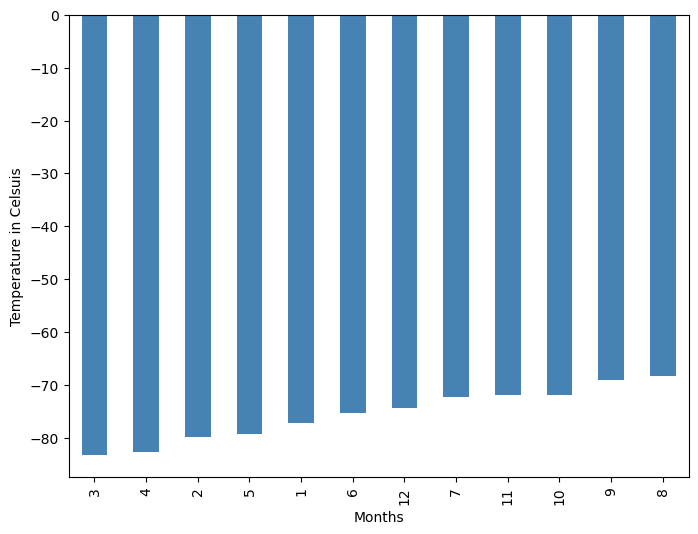

In [18]:
monthly_avg_temp_sorted.plot(kind='bar', color='steelblue', figsize=(8,6))
#set the x and y axis headings
plt.xlabel('Months')
plt.ylabel('Temperature in Celsuis')
plt.show()

In [19]:
# 4. Average pressure by Martian month
monthly_avg_pressure = Mars_df.groupby('month')['pressure'].mean()
monthly_avg_pressure

month
1     862.488506
2     889.455056
3     877.322917
4     806.329897
5     748.557047
6     745.054422
7     795.105634
8     873.829787
9     913.305970
10    887.312500
11    857.014493
12    842.156627
Name: pressure, dtype: float64

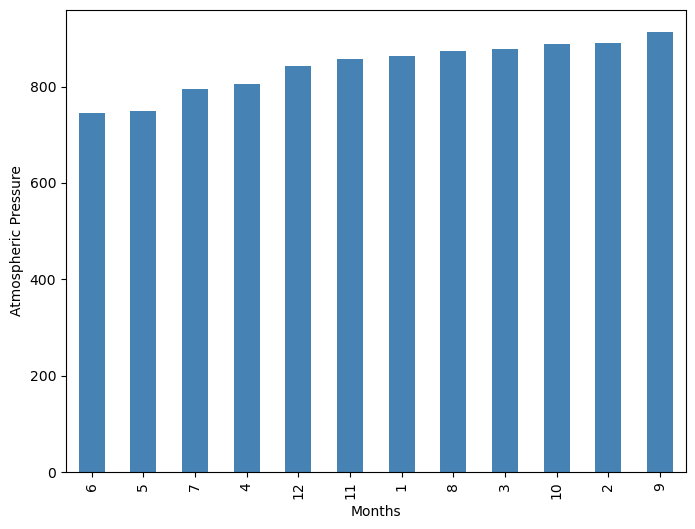

In [20]:
# Sort the average pressure from lowest to highest
monthly_avg_pressure_sorted = monthly_avg_pressure.sort_values(ascending=True)
# Plot the average pressure by month lowest to highest order
monthly_avg_pressure_sorted.plot(kind='bar', color='steelblue', figsize=(8,6))
plt.xlabel ('Months')
plt.ylabel('Atmospheric Pressure')
plt.show()

In [21]:
# 5. How many terrestrial (earth) days are there in a Martian year?

# This is acheived by using the month column to find a full Martian year.
# The first terrestrial_date is then saved and the last date is also saved
# I have used the index values to find the data
# Find the index of the first occurrence of month 1
first_month_1_index = Mars_df.index[Mars_df['month'] == 1][0]

# Find the index of the next occurrence of month 1 
# where the previous row has month 12 and index is greter than first_month_index_1
next_month_1_index = Mars_df[(Mars_df['month'] == 1) & (Mars_df['month'].shift(1) == 12) & (Mars_df['id'] > Mars_df.iloc[first_month_1_index]['id'])].index[0]

# Find the index of the row before the next occurrence of month 1 ie the index of the last month 12 row
end_index = next_month_1_index - 1

# Extract the start and end dates (iloc used as index is an int)
start_date = Mars_df.iloc[first_month_1_index]['terrestrial_date']
end_date = Mars_df.iloc[end_index]['terrestrial_date']

print("Start Date:", start_date)
print("End Date:", end_date)

# Calculate the number of days between start and end dates
days_difference = (end_date - start_date).days
print("Number of Earth days in a Martian year approx. :", days_difference)

Start Date: 2013-08-01 00:00:00
End Date: 2015-06-18 00:00:00
Number of Earth days in a Martian year approx. : 686


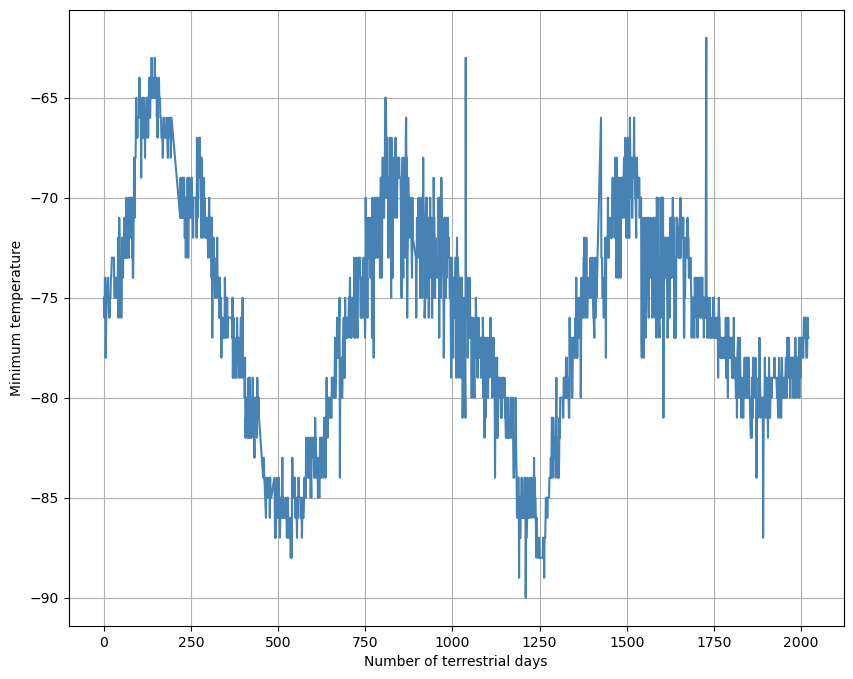

In [22]:
# Add days column to dataframe for plotting
# Calculate the difference in days from the earliest date
Mars_df['days'] = (Mars_df['terrestrial_date'] - Mars_df['terrestrial_date'].min()).dt.days

# Plot minimum temperature vs. number of terrestrial days
plt.figure(figsize=(10, 8))
plt.plot(Mars_df['days'], Mars_df['min_temp'], linestyle='-', color='steelblue')


##### Answers to questions

1. There are 12 months in a cycle on Mars.

2. There is 1867 Martian days worth of data in this dataset.

3. Using averages and plotting on a bargraph we can see the coldest month on Mars is the third month, having the lowest minimum temperature and the warmest month is the eigth month. The average temperture on Mars does not go higher than minus sixty-eight degrees Celsius.

4. Using averages and plotting on a bargraph we can see the lowest atmospheric pressure occurs in the sixth month and the highest in the ninth month.

5. There are approx. 686 earth days in a Martian year, performing an internet search a Martian year is equivalent to 687 earth days. A calculation was performed by finding the fisrt date of a martian year and the last date of a martian year from the dataset, a follow up plot of the minimum temperature vs number of terrestrial days in the dataset was used to verify the calculation.  This plot shows the peak to peak temperatures over time and allows an estimate of the seasonal temperatures, this is a less accurate method as the peak to peak values used returned an approx. cycle of 680 days (peaks at 820 days and 1500 days). 

On average, the third month has the coldest minimum temperature on Mars, and the eighth month is the warmest. But it is always very cold there in human terms!



Atmospheric pressure is, on average, lowest in the sixth month and highest in the ninth.

The distance from peak to peak is roughly 1425-750, or 675 days. A year on Mars appears to be about 675 days from the plot. Internet search confirms that a Mars year is equivalent to 687 earth days.

### Step 6: Save the Data

Export the DataFrame to a CSV file.

In [23]:
# Write the data to a CSV
Mars_df.to_csv('Mars_data.csv', index=False)
print('Mars temperature data has been exported to Mars_data.csv ')

Mars temperature data has been exported to Mars_data.csv 
